# Ia de Aréa de Irrigação

In [24]:
## Importar as bibliotecas

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import zscore
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_areaRegada = pd.read_csv('../data/irrigacao.csv')

In [5]:
df_areaRegada.info

<bound method DataFrame.info of      Horas de Irrigação  Área Irrigada  Área Irrigada por Ângulo
0                     1            100                 66.666667
1                     2            200                133.333333
2                     3            300                200.000000
3                     4            400                266.666667
4                     5            500                333.333333
..                  ...            ...                       ...
294                 295          29500              19666.666667
295                 296          29600              19733.333333
296                 297          29700              19800.000000
297                 298          29800              19866.666667
298                 299          29900              19933.333333

[299 rows x 3 columns]>

In [4]:
df_areaRegada.head(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
0,1,100,66.666667
1,2,200,133.333333
2,3,300,200.000000
3,4,400,266.666667
4,5,500,333.333333
5,6,600,400.000000
6,7,700,466.666667
7,8,800,533.333333
8,9,900,600.000000
9,10,1000,666.666667


In [6]:
df_areaRegada.tail(10)

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
289,290,29000,19333.333333
290,291,29100,19400.000000
291,292,29200,19466.666667
292,293,29300,19533.333333
293,294,29400,19600.000000
294,295,29500,19666.666667
295,296,29600,19733.333333
296,297,29700,19800.000000
297,298,29800,19866.666667
298,299,29900,19933.333333


# Eda

In [ ]:
df_areaRegada.describe()

,Horas de Irrigação,Área Irrigada,Área Irrigada por Ângulo
count,299.000000,299.000000,299.000000
mean,150.000000,15000.000000,10000.000000
std,86.458082,8645.808233,5763.872155
min,1.000000,100.000000,66.666667
25%,75.500000,7550.000000,5033.333333
50%,150.000000,15000.000000,10000.000000
75%,224.500000,22450.000000,14966.666667
max,299.000000,29900.000000,19933.333333


In [8]:
# Retirnado a Área irrigada

df_areaRegada = df_areaRegada.drop(columns=["Área Irrigada"])

In [11]:
# Validadar se funcionou:
df_areaRegada.describe()



,Horas de Irrigação,Área Irrigada por Ângulo
count,299.000000,299.000000
mean,150.000000,10000.000000
std,86.458082,5763.872155
min,1.000000,66.666667
25%,75.500000,5033.333333
50%,150.000000,10000.000000
75%,224.500000,14966.666667
max,299.000000,19933.333333


<Axes: xlabel='Horas de Irrigação', ylabel='Área Irrigada por Ângulo'>

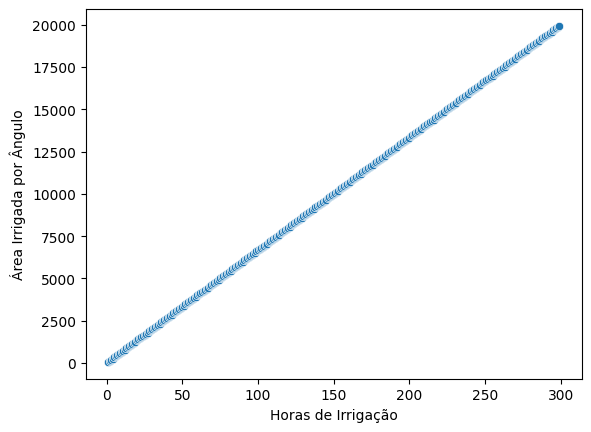

In [12]:
# plot para verificar se possui disprção da media

sns.scatterplot(data=df_areaRegada, x='Horas de Irrigação', y='Área Irrigada por Ângulo')

<Axes: ylabel='Horas de Irrigação'>

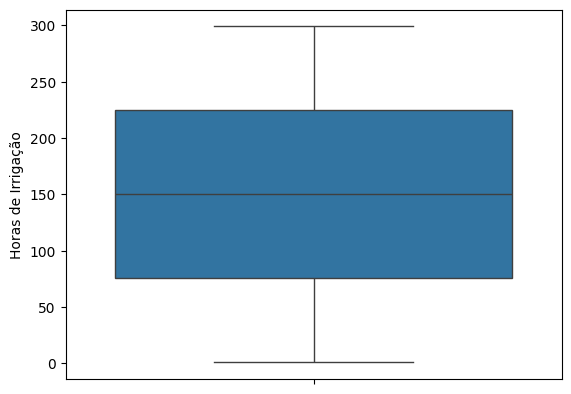

In [13]:
# verificar se possui outliers (horas de irrigação)

sns.boxplot(df_areaRegada, y='Horas de Irrigação')

<Axes: ylabel='Área Irrigada por Ângulo'>

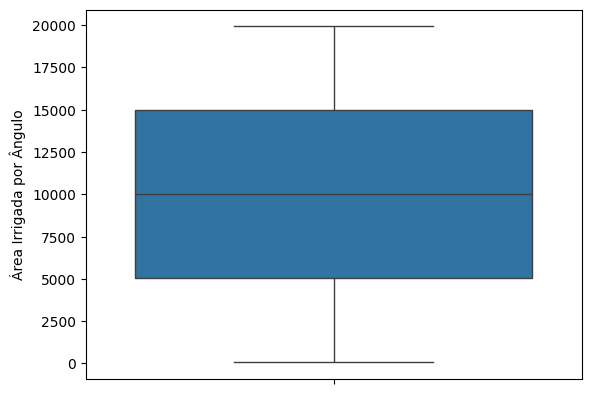

In [14]:
# verificar se possui outliers (area regada)

sns.boxplot(df_areaRegada, y='Área Irrigada por Ângulo')

<Axes: >

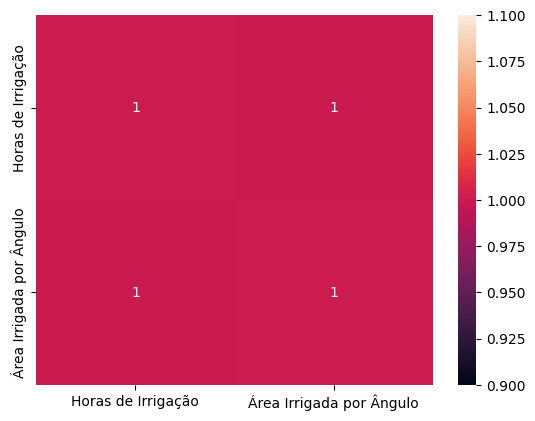

In [15]:
# Correlação de pearson

sns.heatmap(df_areaRegada.corr('pearson'), annot=True)

<Axes: >

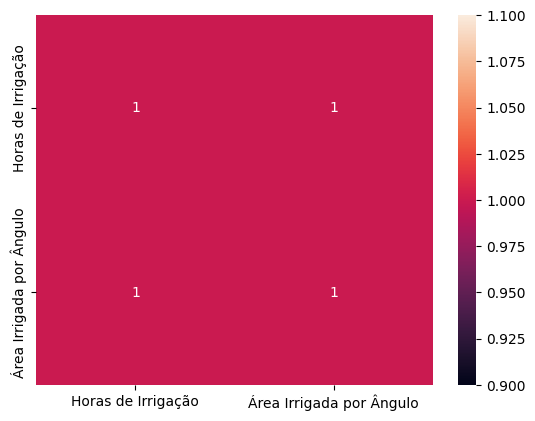

In [16]:
# Correlação de Spearman 

sns.heatmap(df_areaRegada.corr('spearman'), annot=True) 

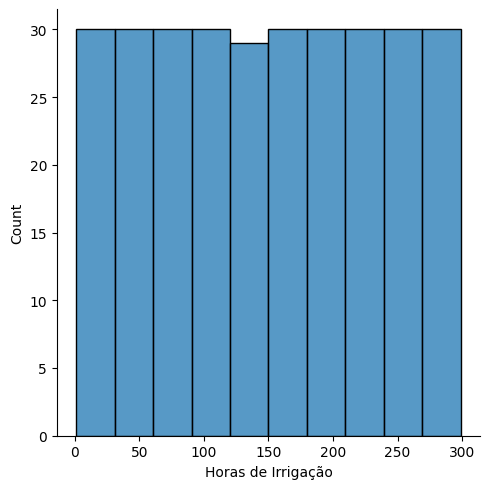

In [18]:
# histograma das variaveis
sns.displot(df_areaRegada, x='Horas de Irrigação')

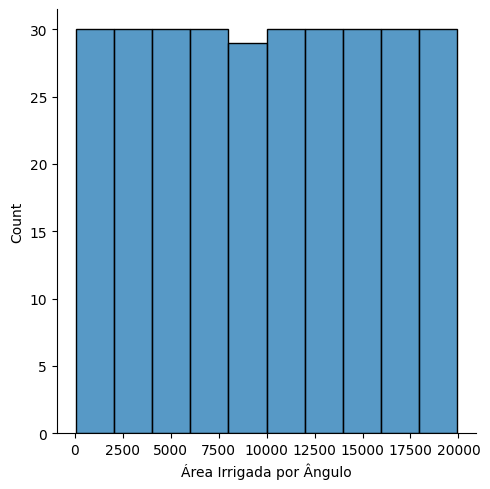

In [19]:
# histograma das variaveis
sns.displot(df_areaRegada, x='Área Irrigada por Ângulo')

# Treinar Modelo

In [20]:
# Dividir datasets para treino e teste
# quando temos aoenas uma feature, precisamos ajustar o shape

X = df_areaRegada['Horas de Irrigação'].values.reshape(-1,1)
y = df_areaRegada['Área Irrigada por Ângulo'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [21]:
#  Instanciar o modelo a ser treinado 
reg_model = LinearRegression()

In [22]:
# Treinar o modelo

reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# imprimir a equação da reta
# y = ax + b 
print('A Equação da era é y= {:4f}x +{:4f}'.format(reg_model.coef_[0][0],reg_model.intercept_[0]))

A Equação da era é y= 66.666667x +-0.000000


# Validar os modelo -Metricas


In [25]:
# predição dos valores com base nos conjuntos de testes

y_pred = reg_model.predict(X_test)

In [ ]:
# Calcular metrica R-squared ou Coeficiente de Determinação
# R2 representa a proporção na variação na variavel dependente que é explicada pela variavel idependente
r2_score(y_test, y_pred)

1.0

In [27]:
# Calcular metrica de MAE (Mena absolute error)
# MAE = Media(y_test - y_pred)
# É uma metrica facil de interpretar
# MAE é menos sensivel a outliers
mean_absolute_error(y_test, y_pred)

1.6854073692229576e-12

In [28]:
# calcular métrica MSE (Mean squeared Error)
# MES = Média(y_test - y_pred)2
# Não é uma metrica fácil de interpretar
# MSE é mais sensivel a outliers e penaliza grandes Erros
mean_squared_error(y_test, y_pred)

5.149387798308218e-24

In [29]:
# calcular métrica RMSE ( squeared Root Mean squeared Error)
# MES = Raiz (y_test - y_pred)2)
# É  uma metrica fácil de interpretar
# MSE é mais sensivel a outliers e penaliza grandes Erros
mean_squared_error(y_test,y_pred, squared=True)

TypeError: got an unexpected keyword argument 'squared'

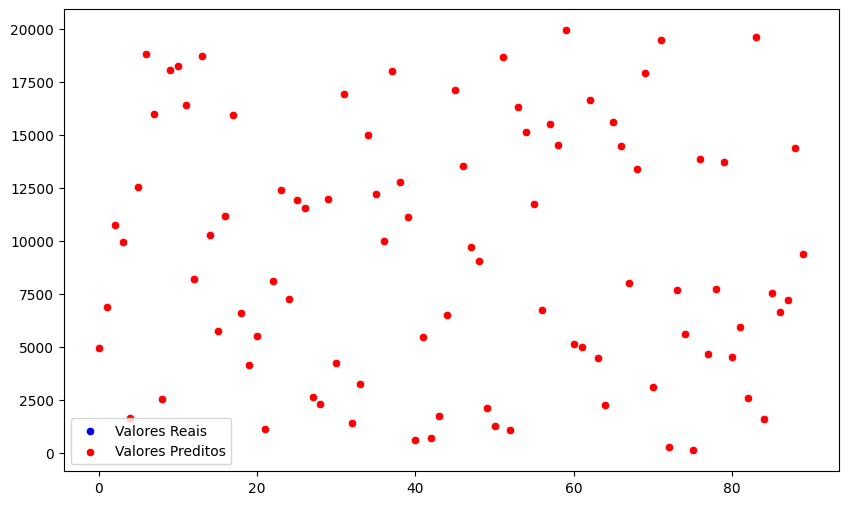

In [30]:
# Análise Gráfica
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))

sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Valores Reais')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Valores Preditos')

plt.legend()
plt.show()


# Analise de residuos


In [31]:
# Calcular Residos
residuos = y_test - y_pred

In [32]:
# Calcular os residuos Padronizados (Standardization)
# Para cada elemento de um conjunto (x - media / desvio_padrao)

residuos_std = zscore(residuos)

<Axes: >

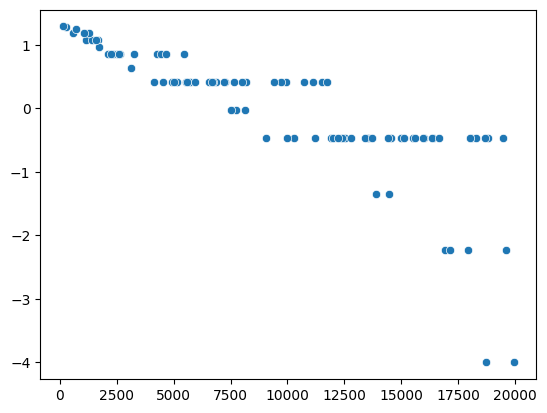

In [34]:
# Verificar lineardade do modelo :
# Se os residuos estiver entre -2 e +2 (na escala padrão) - indica linearidade

# Verificar homogeneidade das variancias (Homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrario
# Se tivermos alguma tendencia ou padrão ( Formam um cone, funil), há heterocedasticidade

sns.scatterplot(x=y_pred.reshape(-1),y=residuos_std.reshape(-1))


In [35]:
# Teste de Normalidade - Shapiro Wilk
# Hipotese 0 = Segue distruibuição normal
# Hipotese 1 - Não segue desbribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrario rejeitamos

stat_shapiro,p_valor_shapiro = shapiro(residuos.reshape(-1))
print("Estatística do teste: {} e P-Valor: {}".format(stat_shapiro, p_valor_shapiro))

Estatística do teste: 0.8172696879209803 e P-Valor: 3.4725200145985586e-09


In [36]:
# Teste de Normalidade - Kolmogorov-Smirnov
# Hipotese 0 = Segue distruibuição normal
# Hipotese 1 - Não segue desbribuição normal
# Se o p-valor > 0.05 não rejeita H0, caso contrario rejeitamos

stat_ks ,p_valor_ks = kstest(residuos.reshape(-1),'norm')
print("Estatística do teste: {} e P-Valor: {}".format(stat_ks , p_valor_ks))

Estatística do teste: 0.49999999999856004 e P-Valor: 2.486951502308412e-21


# Fazer predições sobre o sistema

In [37]:
reg_model.predict([[40]])

array([[2666.66666667]])

In [38]:
# Quantas horas estudar para obter 7000 metros
# y = ax + b
# y - b = ax
# (y - b) / a = x
# x = (y - b)/ a
(7000 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

np.float64(105.00000000000003)

# Salvar Modelo para Usar Depois


In [39]:
import joblib
joblib.dump(reg_model, "Modelo_FarmIa.plk")

['Modelo_FarmIa.plk']